# Bài tập chuyển đổi Code sang Python từ 07-11

## Thông tin học viên:
Họ và tên: Hồ Sĩ An Sơn
Lớp: MSE#11HCM
Mã Hv: 22MSE23060

## 07 : Bài lab ngày 7

### Ex7_01.m :

C:\Users\SonSiHo\AppData\Local\Temp\ipykernel_104484\2318961565.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread('./data/07/street.jfif').astype(np.float32) / 255
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


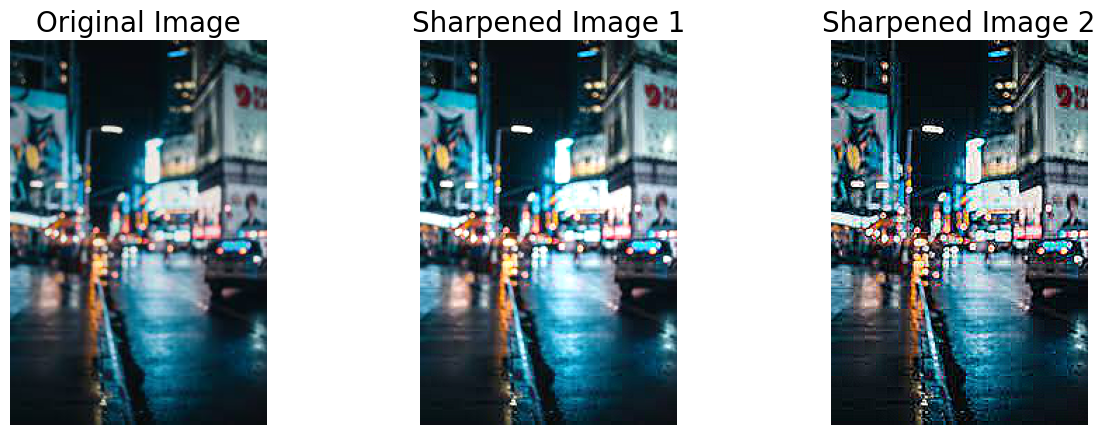

In [2]:
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from imageio import imread
import numpy as np

# Read the image and convert it to double
img = imread('./data/07/street.jfif').astype(np.float32) / 255

# Define the sharpening filters
h1 = np.array([[0, -1, 0], [-1, 10, -1], [0, -1, 0]]) / 5
h2 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Apply the filters to the image
if img.ndim == 3:
    img_sharpened1 = np.zeros_like(img)
    img_sharpened2 = np.zeros_like(img)
    for i in range(img.shape[2]):
        img_sharpened1[:, :, i] = convolve(img[:, :, i], h1, mode='reflect')
        img_sharpened2[:, :, i] = convolve(img[:, :, i], h2, mode='reflect')
else:
    img_sharpened1 = convolve(img, h1, mode='reflect')
    img_sharpened2 = convolve(img, h2, mode='reflect')

# Setup the plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap='gray' if img.ndim == 2 else None)
axs[0].set_title('Original Image', fontsize=20)
axs[0].axis('off')

axs[1].imshow(img_sharpened1, cmap='gray' if img_sharpened1.ndim == 2 else None)
axs[1].set_title('Sharpened Image 1', fontsize=20)
axs[1].axis('off')

axs[2].imshow(img_sharpened2, cmap='gray' if img_sharpened2.ndim == 2 else None)
axs[2].set_title('Sharpened Image 2', fontsize=20)
axs[2].axis('off')

plt.show()

# Optionally, save the figure
# plt.savefig('Sharp.jpg')

### Ex7_2.m:

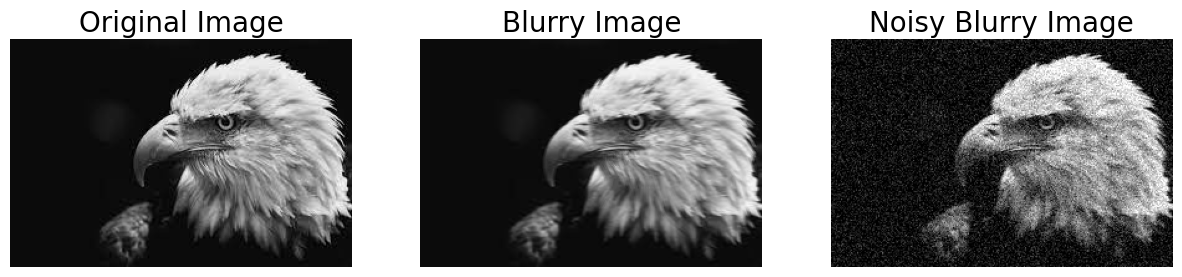

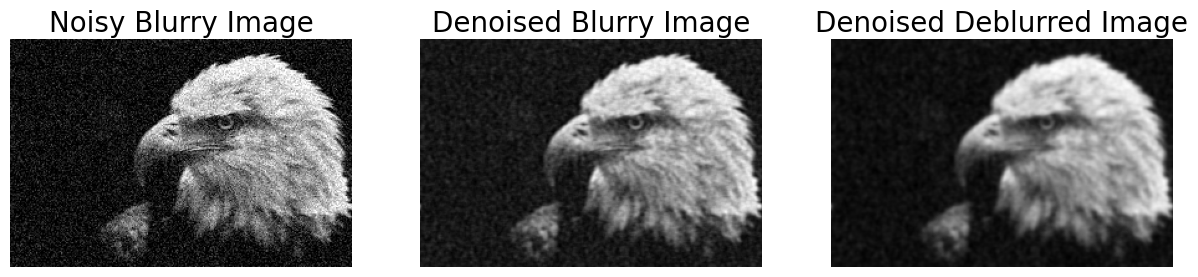

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float, color
from skimage.restoration import unsupervised_wiener
from skimage.util import random_noise
from scipy.signal import convolve2d

# Load and convert the image
img = img_as_float(io.imread('./data/07/eagle.jfif'))

# Convert to grayscale if it's a color image
if img.ndim == 3:
    img = color.rgb2gray(img)

# Create a motion blur kernel (simple horizontal motion blur)
len = 3
theta = 5
psf = np.zeros((len, len))
psf[int(len / 2), :] = np.ones(len)
psf /= psf.sum()

# Apply blurring effect
blurred_img = convolve2d(img, psf, mode='same', boundary='symm')

# Add Gaussian noise
noise_var = 0.01
noisy_blurred_img = random_noise(blurred_img, mode='gaussian', var=noise_var)

# Display images
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image', fontsize=20)
plt.axis('off')

plt.subplot(132)
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurry Image', fontsize=20)
plt.axis('off')

plt.subplot(133)
plt.imshow(noisy_blurred_img, cmap='gray')
plt.title('Noisy Blurry Image', fontsize=20)
plt.axis('off')
plt.show()

# Wiener filter for noise removal
estimated_noise = np.var(noisy_blurred_img - blurred_img)
wnr1, _ = unsupervised_wiener(noisy_blurred_img, psf)

# Deblurring with an additional sharpening kernel
h = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
wnr2, _ = unsupervised_wiener(wnr1, h)

# Display deblurred images
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(noisy_blurred_img, cmap='gray')
plt.title('Noisy Blurry Image', fontsize=20)
plt.axis('off')

plt.subplot(132)
plt.imshow(wnr1, cmap='gray')
plt.title('Denoised Blurry Image', fontsize=20)
plt.axis('off')

plt.subplot(133)
plt.imshow(wnr2, cmap='gray')
plt.title('Denoised Deblurred Image', fontsize=20)
plt.axis('off')
plt.show()

# Mean Square Error (MSE) calculations
mse1 = np.mean((noisy_blurred_img - img)**2)
mse2 = np.mean((wnr2 - img)**2)


## 08 : Bài lab ngày 8

### Ex8_1.m:

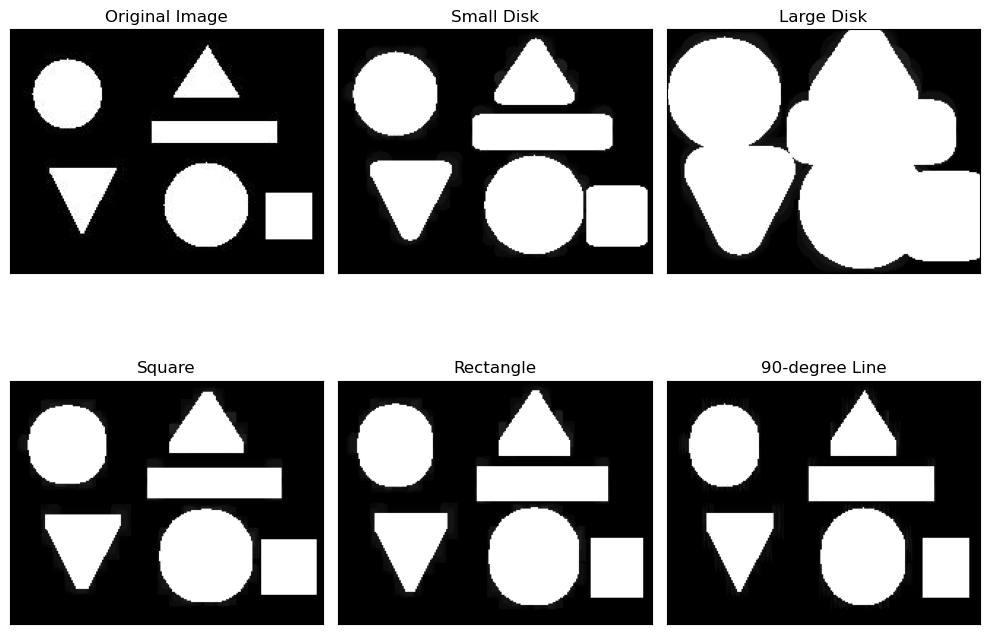

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load test image
img = cv2.imread('./data/08/binary_objects.jpg', cv2.IMREAD_GRAYSCALE)

# Perform dilation with some different structuring elements

# a. Small disk with radius = 5
se1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
bw1 = cv2.dilate(img, se1)

# b. Large disk with radius = 15
se2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (31, 31))
bw2 = cv2.dilate(img, se2)

# c. Square with side = 7
se3 = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
bw3 = cv2.dilate(img, se3)

# d. Rectangle with dimensions = 5x10
se4 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 10))
bw4 = cv2.dilate(img, se4)

# e. Line with length = 10 and declined degree = 90
se5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 10))  # Vertical line
bw5 = cv2.dilate(img, se5)

# Plot images
plt.figure(figsize=(10, 8))
titles = ['Original Image', 'Small Disk', 'Large Disk', 'Square', 'Rectangle', '90-degree Line']
images = [img, bw1, bw2, bw3, bw4, bw5]

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Hide tick values on X and Y axis

plt.tight_layout()
# plt.savefig('Dilation with Different SEs.png')
plt.show()


### Ex8_2.m:

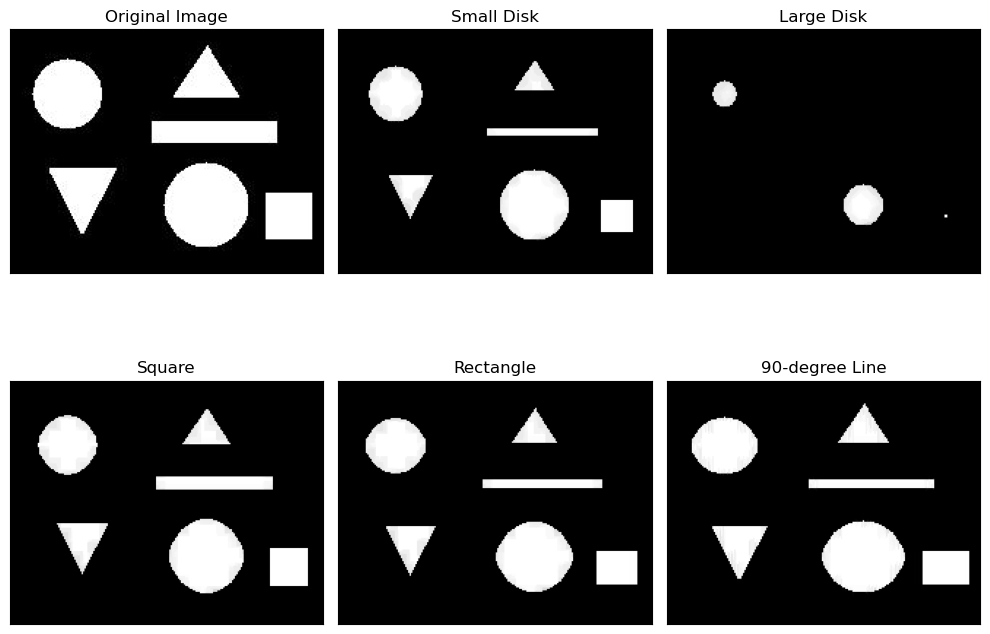

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load test image
img = cv2.imread('./data/08/binary_objects.jpg', cv2.IMREAD_GRAYSCALE)

# Perform erosion with some different structuring elements

# a. Small disk with radius = 5
se1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
bw1 = cv2.erode(img, se1)

# b. Large disk with radius = 15
se2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (31, 31))
bw2 = cv2.erode(img, se2)

# c. Square with side = 7
se3 = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
bw3 = cv2.erode(img, se3)

# d. Rectangle with dimensions = 5x10
se4 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 10))
bw4 = cv2.erode(img, se4)

# e. Line with length = 10 and declined degree = 90
se5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 10))  # Vertical line
bw5 = cv2.erode(img, se5)

# Plot images
plt.figure(figsize=(10, 8))
titles = ['Original Image', 'Small Disk', 'Large Disk', 'Square', 'Rectangle', '90-degree Line']
images = [img, bw1, bw2, bw3, bw4, bw5]

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Hide tick values on X and Y axis

plt.tight_layout()
# plt.savefig('Erosion with Different SEs.png')
plt.show()


### Ex8_3.m:

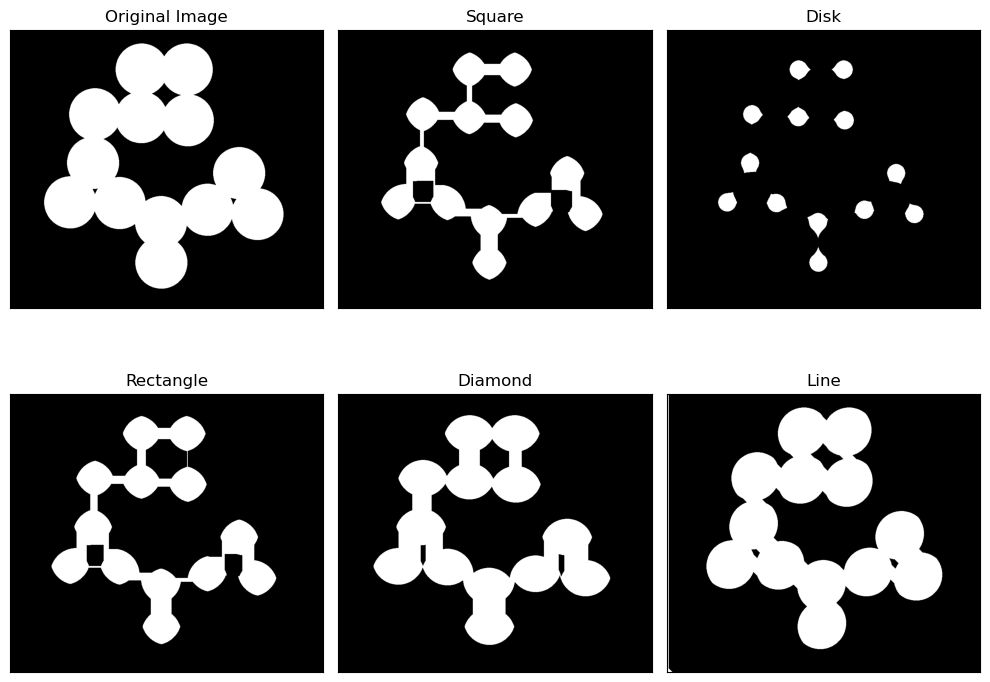

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load test image
img = cv2.imread('./data/08/circles.png', cv2.IMREAD_GRAYSCALE)

# Perform erosion with a square with side = 45
se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (45, 45))
bw1 = cv2.erode(img, se1)

# Perform erosion with a disk with radius = 48
se2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (97, 97))  # 2*radius+1 to include the center pixel
bw2 = cv2.erode(img, se2)

# Perform erosion with a rectangle with dimensions = [35 45]
se3 = cv2.getStructuringElement(cv2.MORPH_RECT, (35, 45))
bw3 = cv2.erode(img, se3)

# Perform erosion with a diamond with radius = 45
# OpenCV does not have a built-in diamond shape, so we need to create it manually
diamond = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 45))
diamond = cv2.dilate(diamond, cv2.getStructuringElement(cv2.MORPH_RECT, (45, 1)))
se4 = diamond
bw4 = cv2.erode(img, se4)

# Perform erosion with a line with length = 30 and inclined degree = 45
se5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 30))
se5 = cv2.warpAffine(se5, cv2.getRotationMatrix2D((0, 15), 45, 1), (30, 30))
bw5 = cv2.erode(img, se5)

# Show images
plt.figure(figsize=(10, 8))
titles = ['Original Image', 'Square', 'Disk', 'Rectangle', 'Diamond', 'Line']
images = [img, bw1, bw2, bw3, bw4, bw5]

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Hide tick values on X and Y axis

plt.tight_layout()
# plt.savefig('Erosion Circles with Different SEs.png')
plt.show()


### Ex8_4.m:

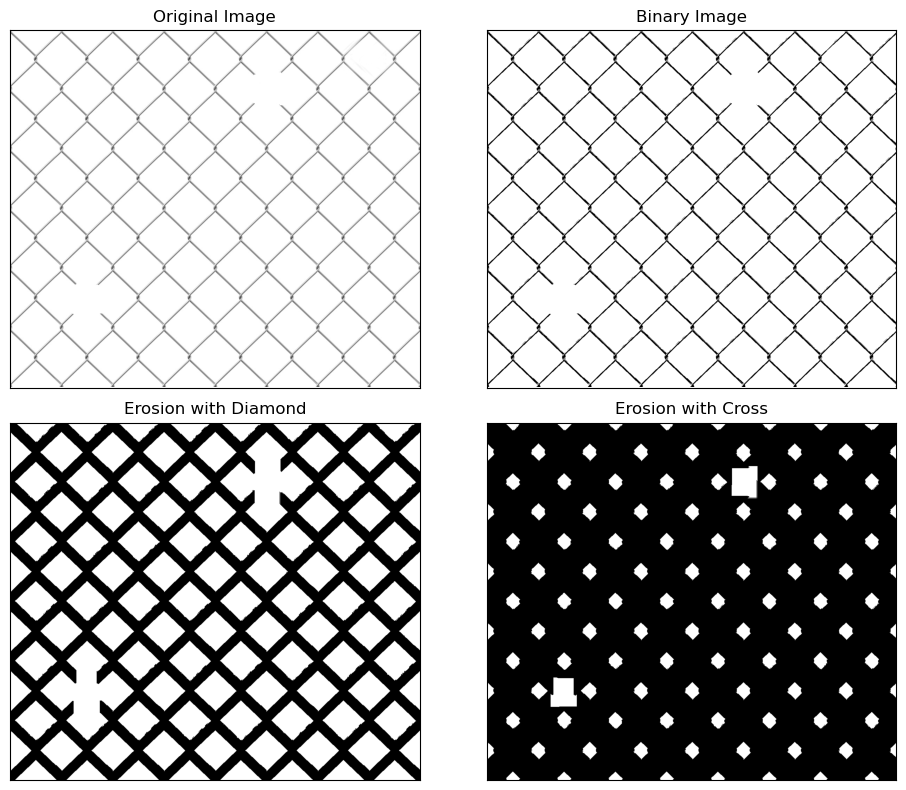

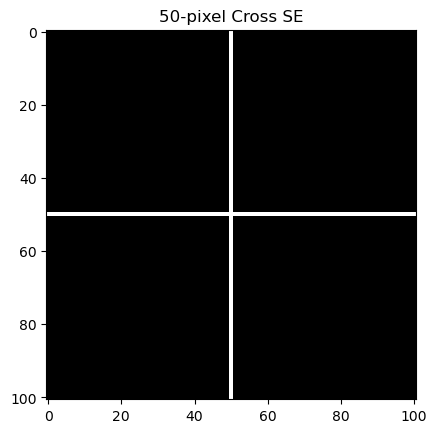

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load test image
img = cv2.imread('./data/08/fence.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert from RGB to grayscale

# Convert grayscale image to binary image
_, bw = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Perform erosion with a diamond with radius = 35
# Manually create a diamond structuring element
diamond = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 35))
diamond = cv2.dilate(diamond, cv2.getStructuringElement(cv2.MORPH_RECT, (35, 1)))
bw1 = cv2.erode(bw, diamond)

# Perform erosion with a cross structuring element
length = 101  # 50 pixels each side
nhood = np.zeros((length, length), dtype=np.uint8)
nhood[length//2, :] = 1
nhood[:, length//2] = 1
cross_se = cv2.getStructuringElement(cv2.MORPH_CROSS, (length, length))
bw2 = cv2.erode(bw, cross_se)

# Plot images
plt.figure(figsize=(10, 8))
titles = ['Original Image', 'Binary Image', 'Erosion with Diamond', 'Erosion with Cross']
images = [gray_img, bw, bw1, bw2]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Hide tick values on X and Y axis

plt.tight_layout()
# plt.savefig('Hole Detection with Erosion.jpg')
plt.show()

# Show cross structuring element
plt.figure()
plt.imshow(nhood, cmap='gray')
plt.title('50-pixel Cross SE')
# plt.savefig('Cross SE.png')
plt.show()


## 09 : Bài lab ngày 9

### Ex9_1.m:

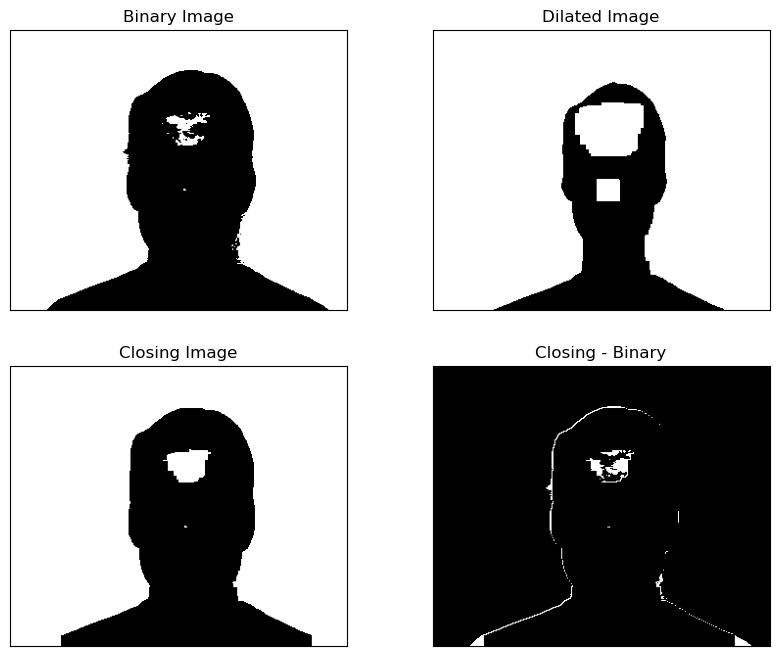

True

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./data/09/man_face.png', cv2.IMREAD_GRAYSCALE)

# Binarize the image
_, bw = cv2.threshold(img, 115, 255, cv2.THRESH_BINARY)

# Create a square structuring element
se = cv2.getStructuringElement(cv2.MORPH_RECT, (22, 22))

# Perform dilation followed by erosion (closing)
img_dilated = cv2.dilate(bw, se)
img_closed = cv2.erode(img_dilated, se)

# Calculate the difference between the closing image and the binary image
img_diff = cv2.subtract(img_closed, bw)

# Displaying the images using matplotlib
plt.figure(figsize=(10, 8))
titles = ['Binary Image', 'Dilated Image', 'Closing Image', 'Closing - Binary']
images = [bw, img_dilated, img_closed, img_diff]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Hide tick values on X and Y axis

plt.show()

# Save the last image
# cv2.imwrite('Small Hole Removal using Closing.jpg', img_diff)


### Ex9_2.m:

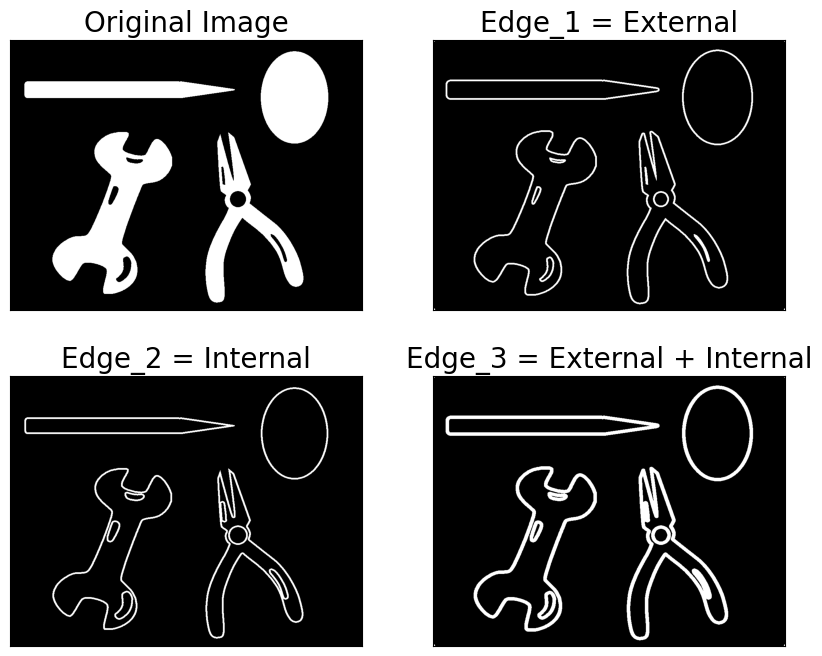

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./data/09/cliparts.png', cv2.IMREAD_GRAYSCALE)
img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

# Create a disk-shaped structuring element
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

# Perform dilation and erosion
img_dilated = cv2.dilate(img, se)
img_eroded = cv2.erode(img, se)

# Extract boundaries
ext_edge = img_dilated - img
int_edge = img - img_eroded
edge = ext_edge + int_edge

# Displaying the images using matplotlib
plt.figure(figsize=(10, 8))
titles = ['Original Image', 'Edge_1 = External', 'Edge_2 = Internal', 'Edge_3 = External + Internal']
images = [img, ext_edge, int_edge, edge]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=20)
    plt.xticks([]), plt.yticks([])  # Hide tick values on X and Y axis

plt.show()

# Save the last figure
# plt.savefig('Boundary Detection using Dilation and Erosion.png')


### Ex9_3.m:

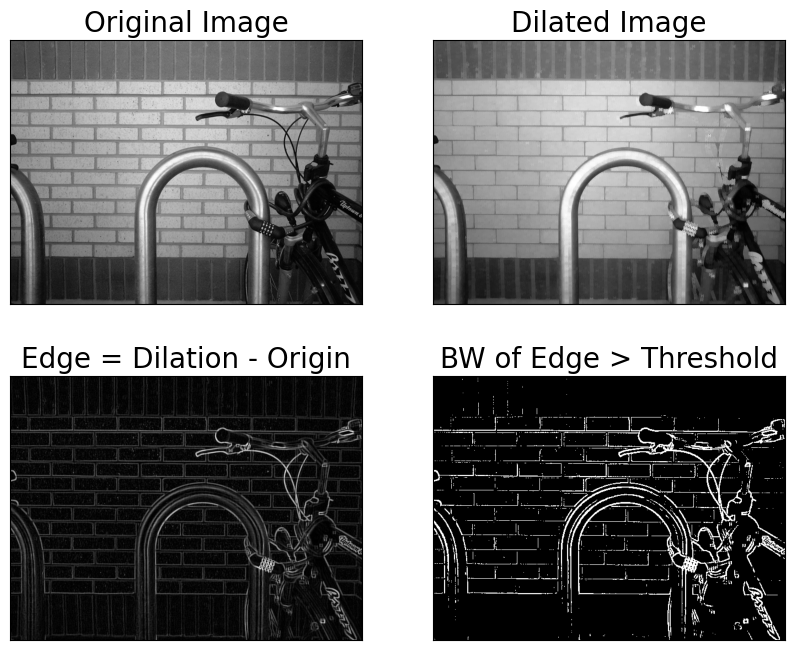

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_diamond_kernel(size):
    """Create a diamond-shaped kernel."""
    assert size % 2 == 1, "Size should be odd"
    mid = size // 2
    kernel = np.zeros((size, size), dtype=np.uint8)
    for i in range(mid+1):
        kernel[mid-i:mid+i+1, mid-i] = 1
        kernel[mid-i:mid+i+1, mid+i] = 1
    return kernel

# Load the image in grayscale
img = cv2.imread('./data/09/bike.png', cv2.IMREAD_GRAYSCALE)
img = img.astype('float32') / 255.0  # Normalize to range 0-1

# Create a diamond-shaped structuring element
se = create_diamond_kernel(5)

# Perform dilation
img_dilated = cv2.dilate(img, se)

# Perform edge detection by subtraction
edge = img_dilated - img

# Thresholding to convert to binary
_, bw = cv2.threshold(edge, 0.2, 1.0, cv2.THRESH_BINARY)

# Displaying the images using matplotlib
plt.figure(figsize=(10, 8))
titles = ['Original Image', 'Dilated Image', 'Edge = Dilation - Origin', 'BW of Edge > Threshold']
images = [img, img_dilated, edge, bw]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=20)
    plt.xticks([]), plt.yticks([])  # Hide tick values on X and Y axis

plt.show()

# Save the last figure
# plt.savefig('Edge Detection by Dilation.jpg')


### Ex9_4.m:

Number of objects before dilation: 3
Number of objects after dilation: 2


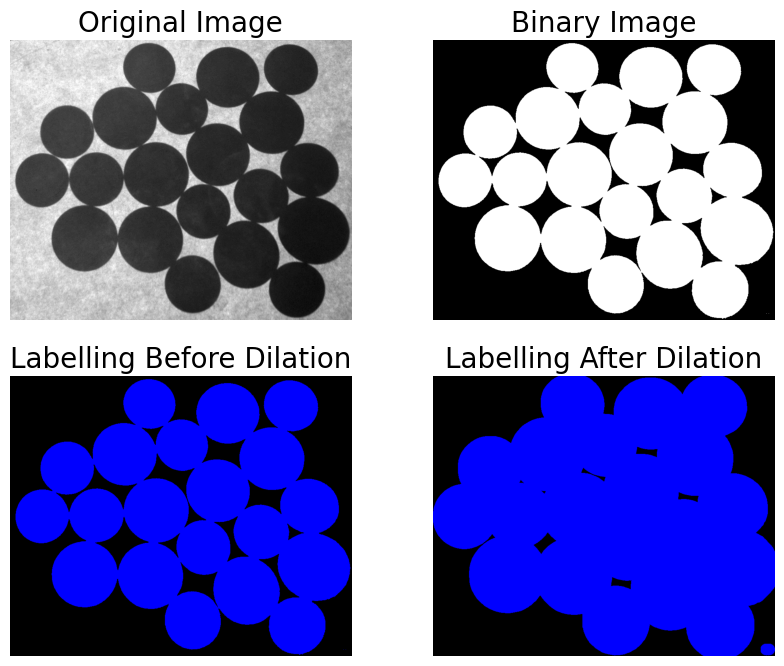

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, color

# Load the image
img = cv2.imread('./data/09/coins.png', cv2.IMREAD_GRAYSCALE)

# Binarize the input image using Otsu's threshold
_, bw = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Label connected components
labels1, num1 = measure.label(bw, connectivity=1, return_num=True)
rgb_label1 = color.label2rgb(labels1, bg_label=0, bg_color=(0, 0, 0), colors=[(0,0,1)])

# print("Number of objects before dilation:", num1)

# Use dilation
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))
bw_dilated = cv2.dilate(bw, se)

# Label connected components after dilation
labels2, num2 = measure.label(bw_dilated, connectivity=1, return_num=True)
rgb_label2 = color.label2rgb(labels2, bg_label=0, bg_color=(0, 0, 0), colors=[(0,0,1)])

# print("Number of objects after dilation:", num2)

# Display images
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image', fontsize=20)
axs[0, 0].axis('off')

axs[0, 1].imshow(bw, cmap='gray')
axs[0, 1].set_title('Binary Image', fontsize=20)
axs[0, 1].axis('off')

axs[1, 0].imshow(rgb_label1)
axs[1, 0].set_title('Labelling Before Dilation', fontsize=20)
axs[1, 0].axis('off')

axs[1, 1].imshow(rgb_label2)
axs[1, 1].set_title('Labelling After Dilation', fontsize=20)
axs[1, 1].axis('off')

plt.show()

# Save the figure
# fig.savefig('Coins Counting using Dilation.png')


### Ex9_5.m:

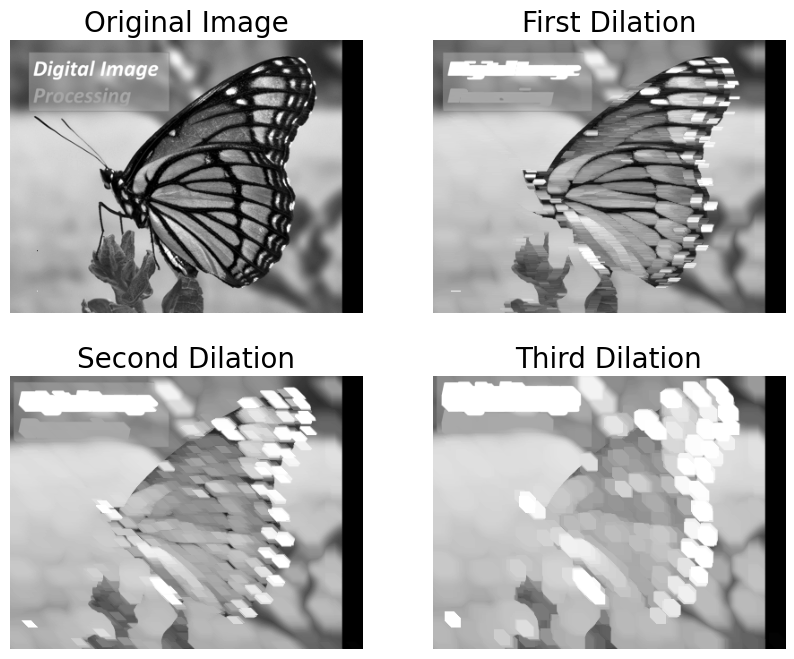

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_line_kernel(length, angle):
    """Create a line-shaped kernel at the given angle."""
    angle_rad = np.deg2rad(angle)  # Convert angle to radians
    x = int(length * np.cos(angle_rad))
    y = int(length * np.sin(angle_rad))

    line_image = np.zeros((2*length+1, 2*length+1), dtype=np.uint8)
    cv2.line(line_image, (length, length), (length+x, length+y), 1, thickness=1)

    return line_image

# Load the image
img = cv2.imread('./data/09/butterfly.png', cv2.IMREAD_GRAYSCALE)

# Define three structuring elements
se1 = create_line_kernel(10, 0)
se2 = create_line_kernel(10, 45)
se3 = create_line_kernel(10, 90)

# Perform a sequence of dilations
img_dilation1 = cv2.dilate(img, se1)
img_dilation2 = cv2.dilate(img_dilation1, se2)
img_dilation3 = cv2.dilate(img_dilation2, se3)

# Display images using matplotlib
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image', fontsize=20)
axs[0, 0].axis('off')

axs[0, 1].imshow(img_dilation1, cmap='gray')
axs[0, 1].set_title('First Dilation', fontsize=20)
axs[0, 1].axis('off')

axs[1, 0].imshow(img_dilation2, cmap='gray')
axs[1, 0].set_title('Second Dilation', fontsize=20)
axs[1, 0].axis('off')

axs[1, 1].imshow(img_dilation3, cmap='gray')
axs[1, 1].set_title('Third Dilation', fontsize=20)
axs[1, 1].axis('off')

plt.show()

# Save the figure
# fig.savefig('Cascaded Dilations.png')


### Ex9_7.m:

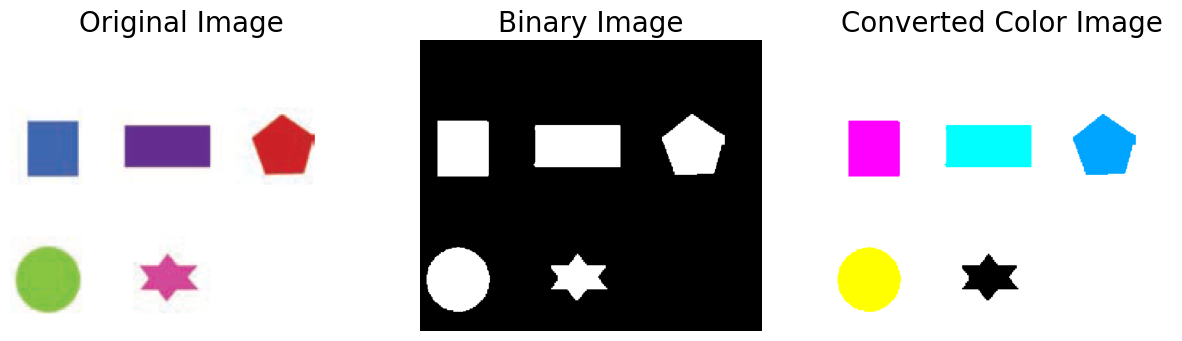

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, color

# Load the image
img = cv2.imread('./data/09/shapes.png')

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Binarize the grayscale image using Otsu's method
_, bw_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Label connected components
labels, num = measure.label(bw_img, connectivity=2, return_num=True)

# Define the color map (1. circle = red; 2. square = magenta; 3. rectangle = yellow;
# 4. asterisk = cyan; 5. pentagon = black)
# Colors in BGR format as OpenCV uses BGR by default
cmap = np.array([[0, 165, 255],   # Orange for circle (mistake in original comment)
                 [255, 0, 255],   # Magenta for square
                 [0, 255, 255],   # Yellow for rectangle
                 [255, 255, 0],   # Cyan for asterisk
                 [0, 0, 0]])      # Black for pentagon

# Convert labels to RGB image using the colormap
rgb_label = color.label2rgb(labels, colors=cmap/255.0, bg_label=0, bg_color=(1, 1, 1))

# Display images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image', fontsize=20)
axs[0].axis('off')

axs[1].imshow(bw_img, cmap='gray')
axs[1].set_title('Binary Image', fontsize=20)
axs[1].axis('off')

axs[2].imshow(rgb_label)
axs[2].set_title('Converted Color Image', fontsize=20)
axs[2].axis('off')

plt.show()

# Save the figure
# fig.savefig('Color Conversion.jpg')


## 10 : Bài lab ngày 10

### Ex10_1.m: